In [10]:
import sqlite3
import pandas as pd
import pyodbc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
conn = sqlite3.connect('Tripsdata.db')

In [12]:
df = pd.read_sql_query('SELECT * FROM "Trips Data"', conn)

In [13]:
conn.close()

In [14]:
df.head()

,Level,Date,State FIPS,State Postal Code,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
0,State,2019-01-01 00:00:00,32.0,NV,753054.0,2272063.0,9139676.0,2999886.0,2181216.0,1039500.0,1378024.0,1108436.0,222837.0,93301.0,73578.0,24471.0,18427.0,32-00000-20190101,0.0,1.0
1,State,2019-01-01 00:00:00,12.0,FL,4524666.0,16709556.0,55258300.0,16036792.0,14469767.0,6658624.0,7977612.0,6604304.0,2113009.0,796740.0,412224.0,95341.0,93887.0,12-00000-20190101,0.0,1.0
2,State,2019-01-01 00:00:00,11.0,DC,241030.0,459278.0,3114055.0,1314825.0,833796.0,367547.0,344116.0,183744.0,42096.0,10730.0,8109.0,3476.0,5616.0,11-00000-20190101,0.0,1.0
3,State,2019-01-01 00:00:00,10.0,DE,224457.0,739757.0,2420942.0,584323.0,640348.0,305441.0,370359.0,314102.0,128454.0,50542.0,22701.0,2474.0,2198.0,10-00000-20190101,0.0,1.0
4,State,2019-01-01 00:00:00,9.0,CT,853894.0,2707851.0,9468961.0,2375021.0,2618933.0,1189575.0,1331356.0,1211252.0,449947.0,192960.0,56618.0,12031.0,31268.0,09-00000-20190101,0.0,1.0


In [28]:
df.shape

(45267, 19)

In [15]:
df.columns

Index(['Level', 'Date', 'State FIPS', 'State Postal Code',
       'Population Staying at Home', 'Population Not Staying at Home',
       'Number of Trips', 'Number of Trips <1', 'Number of Trips 1-3',
       'Number of Trips 3-5', 'Number of Trips 5-10', 'Number of Trips 10-25',
       'Number of Trips 25-50', 'Number of Trips 50-100',
       'Number of Trips 100-250', 'Number of Trips 250-500',
       'Number of Trips >=500', 'Row ID', 'Week', 'Month'],
      dtype='object')

In [16]:
df.drop(columns=["Level"], axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45267 entries, 0 to 45266
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            45267 non-null  object 
 1   State FIPS                      45267 non-null  float64
 2   State Postal Code               45267 non-null  object 
 3   Population Staying at Home      45267 non-null  float64
 4   Population Not Staying at Home  45267 non-null  float64
 5   Number of Trips                 45267 non-null  float64
 6   Number of Trips <1              45267 non-null  float64
 7   Number of Trips 1-3             45267 non-null  float64
 8   Number of Trips 3-5             45267 non-null  float64
 9   Number of Trips 5-10            45267 non-null  float64
 10  Number of Trips 10-25           45267 non-null  float64
 11  Number of Trips 25-50           45267 non-null  float64
 12  Number of Trips 50-100          

In [18]:
def missing_values(column):
    na_values = df[column].isna().sum()
    return na_values

In [19]:
for i in df.columns:
    print(f"Column name: {i}")
    print(f"Missing values: {missing_values(i)}")
    print(f"Total value count: {df[i].count()}")
    print(f"Missing value percentage: {missing_values(i)/df[i].count()}% \n" )

Column name: Date
Missing values: 0
Total value count: 45267
Missing value percentage: 0.0% 

Column name: State FIPS
Missing values: 0
Total value count: 45267
Missing value percentage: 0.0% 

Column name: State Postal Code
Missing values: 0
Total value count: 45267
Missing value percentage: 0.0% 

Column name: Population Staying at Home
Missing values: 0
Total value count: 45267
Missing value percentage: 0.0% 

Column name: Population Not Staying at Home
Missing values: 0
Total value count: 45267
Missing value percentage: 0.0% 

Column name: Number of Trips
Missing values: 0
Total value count: 45267
Missing value percentage: 0.0% 

Column name: Number of Trips <1
Missing values: 0
Total value count: 45267
Missing value percentage: 0.0% 

Column name: Number of Trips 1-3
Missing values: 0
Total value count: 45267
Missing value percentage: 0.0% 

Column name: Number of Trips 3-5
Missing values: 0
Total value count: 45267
Missing value percentage: 0.0% 

Column name: Number of Trips 5-1

In [20]:
data_columns = df[["Population Staying at Home", "Population Not Staying at Home", "Number of Trips", "Number of Trips <1", "Number of Trips 1-3", "Number of Trips 3-5", "Number of Trips 5-10", "Number of Trips 10-25", "Number of Trips 25-50", "Number of Trips 50-100", "Number of Trips 100-250", "Number of Trips 250-500", "Number of Trips >=500"]]
data_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
Population Staying at Home,45267.0,1.428632e+06,1.735887e+06,571.0,376033.5,900199.0,1738435.0,15719267.0
Population Not Staying at Home,45267.0,4.976276e+06,5.619811e+06,4618.0,1366908.0,3504438.0,5785856.5,33675879.0
Number of Trips,45267.0,2.317937e+07,2.608511e+07,17543.0,5799036.5,15685029.0,28944518.0,206864081.0
Number of Trips <1,45267.0,5.752116e+06,6.818360e+06,2166.0,1453253.5,3670768.0,7033357.5,58535102.0
Number of Trips 1-3,45267.0,5.777840e+06,6.555676e+06,2168.0,1485978.0,3904398.0,7214650.5,57222317.0
Number of Trips 3-5,45267.0,2.839236e+06,3.138751e+06,948.0,725626.0,1934135.0,3575975.0,26937995.0
Number of Trips 5-10,45267.0,3.584870e+06,3.972562e+06,1558.0,893777.5,2412702.0,4561396.0,30720927.0
Number of Trips 10-25,45267.0,3.504542e+06,3.904028e+06,2768.0,891253.0,2379404.0,4623131.0,30774902.0
Number of Trips 25-50,45267.0,1.134852e+06,1.267036e+06,656.0,306717.0,792821.0,1443285.5,9756023.0
Number of Trips 50-100,45267.0,3.713002e+05,4.058182e+05,530.0,120522.5,274656.0,446826.5,3330076.0


In [21]:
data_columns.corr()

,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500
Population Staying at Home,1.000000,0.930640,0.866426,0.870476,0.862630,0.856471,0.848241,0.840316,0.869959,0.908069,0.862407,0.837184,0.614280
Population Not Staying at Home,0.930640,1.000000,0.966007,0.954270,0.960839,0.960157,0.957780,0.957357,0.972361,0.962598,0.909205,0.891764,0.689142
Number of Trips,0.866426,0.966007,1.000000,0.992446,0.997492,0.997691,0.996568,0.991525,0.978067,0.924869,0.841624,0.826423,0.751561
Number of Trips <1,0.870476,0.954270,0.992446,1.000000,0.989457,0.987018,0.983245,0.972763,0.957603,0.909241,0.826884,0.806172,0.734393
Number of Trips 1-3,0.862630,0.960839,0.997492,0.989457,1.000000,0.996233,0.991904,0.984596,0.971696,0.920524,0.832802,0.817790,0.758633
Number of Trips 3-5,0.856471,0.960157,0.997691,0.987018,0.996233,1.000000,0.997675,0.988938,0.970066,0.913359,0.832318,0.817867,0.755333
Number of Trips 5-10,0.848241,0.957780,0.996568,0.983245,0.991904,0.997675,1.000000,0.994674,0.972514,0.909192,0.827901,0.816195,0.752626
Number of Trips 10-25,0.840316,0.957357,0.991525,0.972763,0.984596,0.988938,0.994674,1.000000,0.983363,0.914355,0.827401,0.819883,0.745478
Number of Trips 25-50,0.869959,0.972361,0.978067,0.957603,0.971696,0.970066,0.972514,0.983363,1.000000,0.960916,0.877843,0.865236,0.722601
Number of Trips 50-100,0.908069,0.962598,0.924869,0.909241,0.920524,0.913359,0.909192,0.914355,0.960916,1.000000,0.946176,0.903956,0.659594


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'Population Staying at Home'),
  Text(0, 1.5, 'Population Not Staying at Home'),
  Text(0, 2.5, 'Number of Trips'),
  Text(0, 3.5, 'Number of Trips <1'),
  Text(0, 4.5, 'Number of Trips 1-3'),
  Text(0, 5.5, 'Number of Trips 3-5'),
  Text(0, 6.5, 'Number of Trips 5-10'),
  Text(0, 7.5, 'Number of Trips 10-25'),
  Text(0, 8.5, 'Number of Trips 25-50'),
  Text(0, 9.5, 'Number of Trips 50-100'),
  Text(0, 10.5, 'Number of Trips 100-250'),
  Text(0, 11.5, 'Number of Trips 250-500'),
  Text(0, 12.5, 'Number of Trips >=500')])

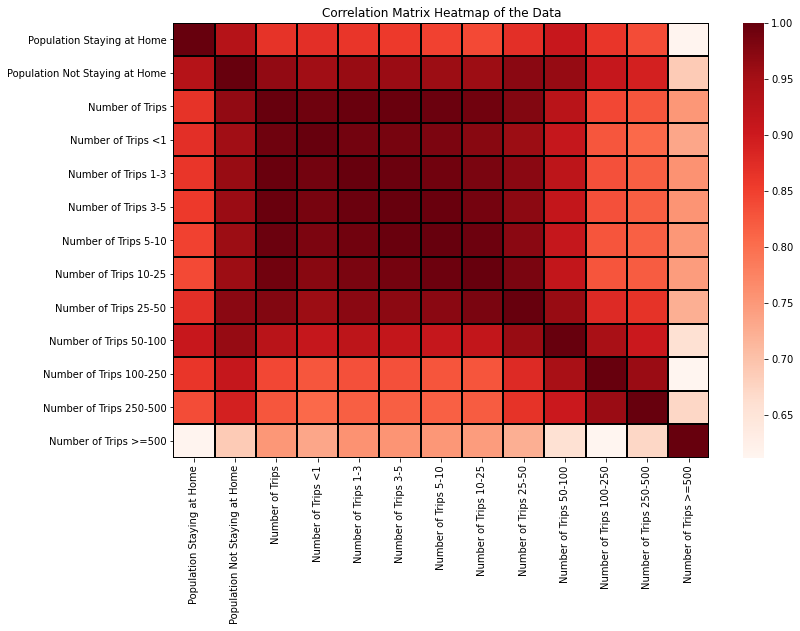

In [22]:
figure1 = plt.figure(figsize = (12,8))
sns.heatmap(data_columns.corr(), cmap='Reds', linewidths=1, linecolor='black')
plt.title('Correlation Matrix Heatmap of the Data')
plt.yticks(rotation=0)

In [23]:
corr_matrix = df.corr()
print(corr_matrix)

                                State FIPS  Population Staying at Home  \
State FIPS                        1.000000                   -0.085657   
Population Staying at Home       -0.085657                    1.000000   
Population Not Staying at Home   -0.071642                    0.930640   
Number of Trips                  -0.059071                    0.866426   
Number of Trips <1               -0.065476                    0.870476   
Number of Trips 1-3              -0.062139                    0.862630   
Number of Trips 3-5              -0.057920                    0.856471   
Number of Trips 5-10             -0.052791                    0.848241   
Number of Trips 10-25            -0.048195                    0.840316   
Number of Trips 25-50            -0.061242                    0.869959   
Number of Trips 50-100           -0.056072                    0.908069   
Number of Trips 100-250          -0.016730                    0.862407   
Number of Trips 250-500          -0.05

<AxesSubplot:>

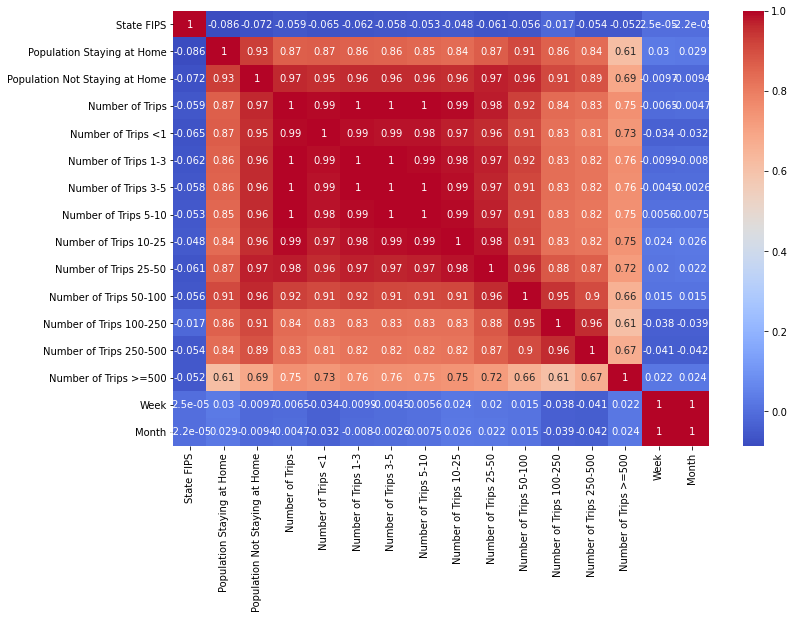

In [24]:
figure2 = plt.figure(figsize = (12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [25]:
def value_frequency(column):
    frequency = df[column].value_counts().sort_index()
    return frequency

def value_proportions(column):
    proportions = df[column].value_counts(normalize=True).sort_index()
    return proportions

In [26]:
categorical_columns = df[["State FIPS", "State Postal Code", "Week", "Month"]]

for i in categorical_columns:
    print(f"Column name: {i}")
    print(f"Number of values: {df[i].count()} \n")
    print("Value_frequencies")
    print(f"{value_frequency(i)} \n")
    print("Value_proportions")
    print(f"{value_proportions(i)} \n")
    print("-------------------------------")

Column name: State FIPS
Number of values: 45267 

Value_frequencies
1.0     887
2.0     887
4.0     887
5.0     916
6.0     887
8.0     887
9.0     887
10.0    887
11.0    887
12.0    887
13.0    887
15.0    887
16.0    887
17.0    887
18.0    887
19.0    887
20.0    887
21.0    887
22.0    887
23.0    887
24.0    887
25.0    887
26.0    887
27.0    887
28.0    887
29.0    887
30.0    887
31.0    887
32.0    887
33.0    887
34.0    887
35.0    887
36.0    887
37.0    887
38.0    887
39.0    887
40.0    887
41.0    887
42.0    887
44.0    887
45.0    887
46.0    887
47.0    887
48.0    887
49.0    887
50.0    887
51.0    887
53.0    887
54.0    887
55.0    887
56.0    888
Name: State FIPS, dtype: int64 

Value_proportions
1.0     0.019595
2.0     0.019595
4.0     0.019595
5.0     0.020235
6.0     0.019595
8.0     0.019595
9.0     0.019595
10.0    0.019595
11.0    0.019595
12.0    0.019595
13.0    0.019595
15.0    0.019595
16.0    0.019595
17.0    0.019595
18.0    0.019595
19.0    0.0195

In [27]:
categorical_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
State FIPS,45267.0,28.946031,15.684051,1.0,16.0,29.0,42.0,56.0
Week,45267.0,23.394327,15.014904,0.0,11.0,21.0,36.0,52.0
Month,45267.0,5.920008,3.446575,1.0,3.0,5.0,9.0,12.0


### Due to graphs crashing python *constantly*, they have been generated in Power BI for this project

In [ ]:
figure1, axes = plt.subplots(3,1, figsize=(12,8), sharex=True)
sns.histplot(data=df, x="Number of Trips <1", ax=axes[0], discrete=True).set(title="Number of Trips <1")
sns.histplot(data=df, x="Number of Trips 1-3", ax=axes[1], discrete=True).set(title="Number of Trips 1-3")
sns.histplot(data=df, x="Number of Trips 5-10", ax=axes[2], discrete=True).set(title="Number of Trips 5-10", xlabel="Trips")

In [ ]:
figure2 = sns.histplot(data=df, x='Number of Trips', discrete=True)
plt.title("Number of Trips")